# The 17 Wallpaper Groups
## A Complete Mathematical Guide

This notebook provides a comprehensive introduction to the 17 wallpaper groups (plane crystallographic groups), including mathematical foundations, visual examples, and code.

---

## 1. Fundamental Concepts

### 1.1 What is a Periodic Pattern?

A **periodic 2D pattern** is a design that repeats infinitely in the plane along two independent directions.

Examples:
- Wallpaper on a wall
- Floor tiles
- Honeycomb structure
- Crystal lattices

Formally, a pattern is periodic if there exist two vectors $\vec{a}$ and $\vec{b}$ (non-parallel) such that translating the pattern by any combination $m\vec{a} + n\vec{b}$ (where $m, n$ are integers) produces the same pattern.

### 1.2 Symmetry Operations

A **symmetry** is a transformation that leaves the pattern unchanged. The possible symmetries are:

| Symmetry | Symbol | Description | Visual |
|----------|--------|-------------|--------|
| **Translation** | $T$ | Move without rotating | → → → |
| **Rotation** | $C_n$ | Rotate $\frac{360°}{n}$ around a point | ↻ |
| **Reflection** | $\sigma$ | Mirror across a line | ⟷ |
| **Glide Reflection** | $g$ | Mirror + translation parallel to axis | ↮ |

### 1.3 Rotation Order

The **rotation order** $n$ indicates how many rotations return to the start:

$$C_n = \text{rotation of } \frac{360°}{n}$$

| Order $n$ | Angle | Name | Example |
|-----------|-------|------|---------|  
| 1 | 360° | Trivial (no rotation) | Letter "R" |
| 2 | 180° | Binary | Letter "S" |
| 3 | 120° | Ternary | Equilateral triangle |
| 4 | 90° | Quaternary | Square |
| 6 | 60° | Senary | Hexagon |

---
## 2. The Crystallographic Restriction

### Theorem

> **Crystallographic Restriction Theorem:** In a periodic 2D pattern, the only possible rotation orders are $n \in \{1, 2, 3, 4, 6\}$.

**Why can't we have 5-fold, 7-fold, 8-fold rotation?**

### Proof (Intuitive)

Consider a lattice of periodically repeating points. If there's a rotation center $C_n$, then:

1. Take a lattice point $P$
2. Rotate it by $\frac{360°}{n}$ to get $P'$
3. $P'$ must also be a lattice point
4. The distance between lattice points has a minimum (cannot be arbitrarily small)

This geometric constraint implies:

$$2\cos\left(\frac{2\pi}{n}\right) \in \mathbb{Z}$$

The only values of $n$ satisfying this are $\{1, 2, 3, 4, 6\}$.

| $n$ | $\cos(2\pi/n)$ | $2\cos(2\pi/n)$ | Integer? |
|-----|----------------|-----------------|----------|
| 1 | 1 | 2 | ✓ |
| 2 | -1 | -2 | ✓ |
| 3 | -0.5 | -1 | ✓ |
| 4 | 0 | 0 | ✓ |
| 5 | 0.309... | 0.618... | ✗ |
| 6 | 0.5 | 1 | ✓ |
| 7 | 0.623... | 1.247... | ✗ |

This is why there are exactly **17 wallpaper groups** - no more, no less.

---
## 3. Group Theory Basics

### What is a Group?

A **group** $(G, \cdot)$ is a set $G$ with an operation $\cdot$ satisfying:

| Property | Definition | Meaning |
|----------|------------|--------|
| **Closure** | If $a, b \in G$, then $a \cdot b \in G$ | Combining two symmetries gives another symmetry |
| **Associativity** | $(a \cdot b) \cdot c = a \cdot (b \cdot c)$ | Grouping order doesn't matter |
| **Identity** | There exists $e$ such that $e \cdot a = a \cdot e = a$ | "Do nothing" exists |
| **Inverse** | For each $a$, exists $a^{-1}$ such that $a \cdot a^{-1} = e$ | Every transformation can be undone |

### Point Groups

Groups describing symmetries around a fixed point:

| Group | Elements | Order |
|-------|----------|-------|
| $C_1$ | $\{e\}$ | 1 |
| $C_2$ | $\{e, R_{180°}\}$ | 2 |
| $C_3$ | $\{e, R_{120°}, R_{240°}\}$ | 3 |
| $C_4$ | $\{e, R_{90°}, R_{180°}, R_{270°}\}$ | 4 |
| $C_6$ | $\{e, R_{60°}, R_{120°}, R_{180°}, R_{240°}, R_{300°}\}$ | 6 |
| $D_n$ | $C_n$ + reflections | $2n$ |

### The 17 Groups Theorem

> **Theorem:** There exist exactly **17** symmetry groups for periodic patterns in the plane.

---
## 4. Setup

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
from src.dataset.pattern_generator import WallpaperGroupGenerator, WALLPAPER_GROUPS

# Create generator
generator = WallpaperGroupGenerator(resolution=256, seed=42)

# Dark theme
plt.style.use('dark_background')

print(f"Available groups: {list(WALLPAPER_GROUPS.keys())}")
print(f"Total: {len(WALLPAPER_GROUPS)} groups")

Available groups: ['p1', 'p2', 'pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm', 'p4', 'p4m', 'p4g', 'p3', 'p3m1', 'p31m', 'p6', 'p6m']
Total: 17 groups


---
## 5. All 17 Groups Overview

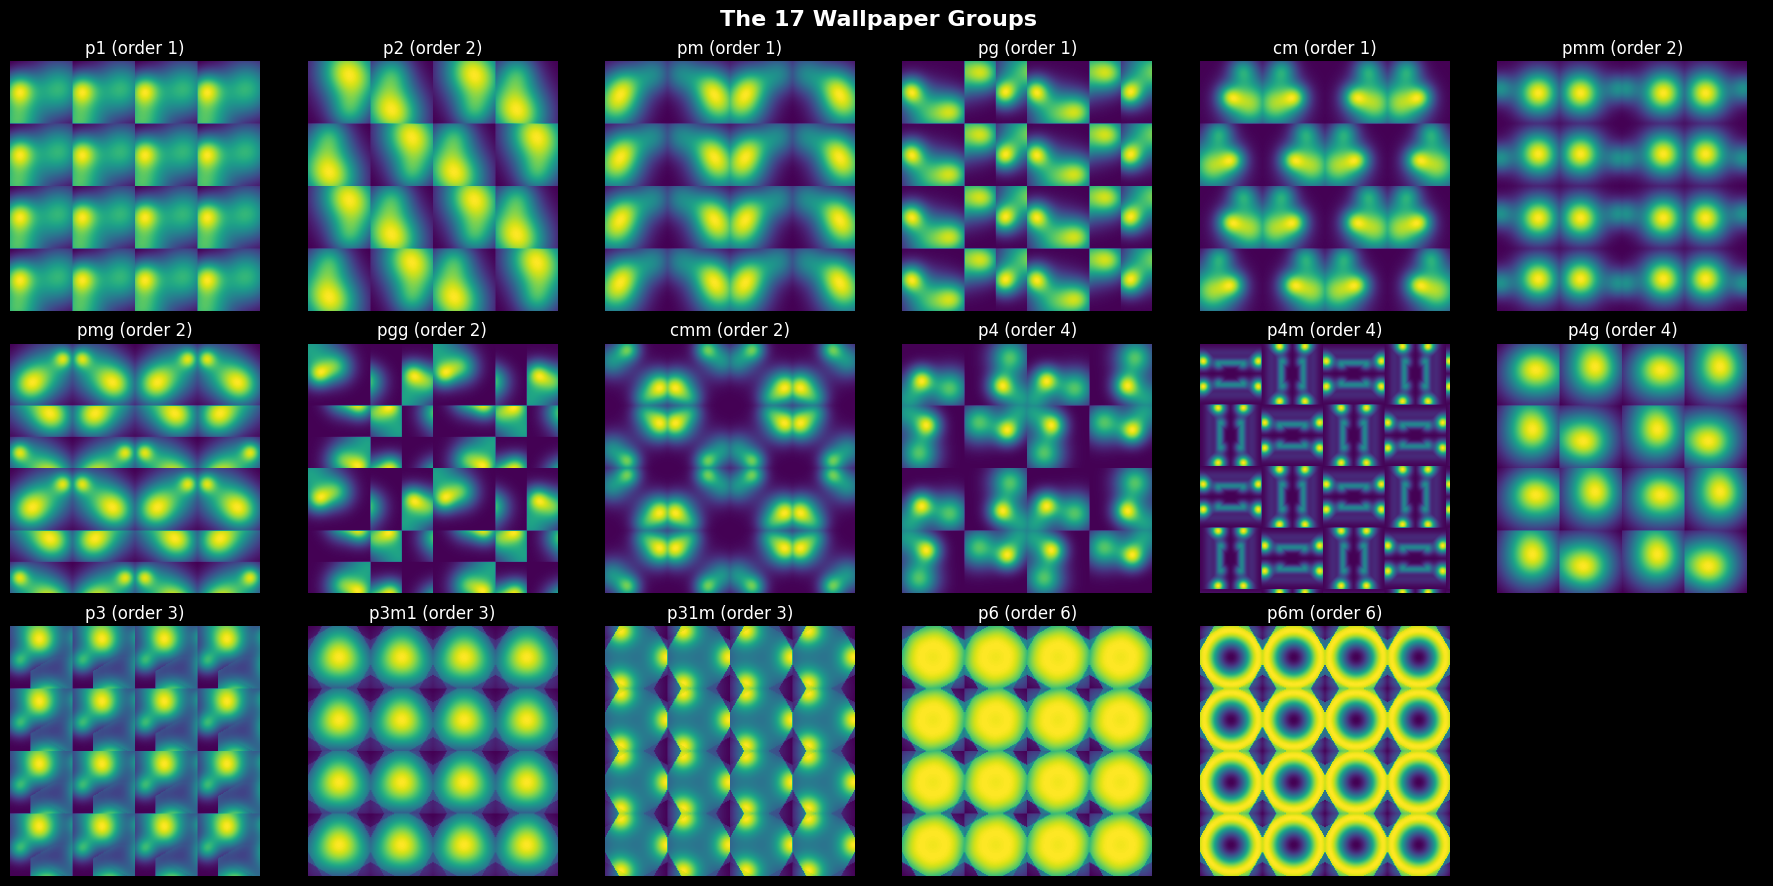

In [2]:
# Generate all 17 groups
all_patterns = generator.generate_all(motif_size=64, complexity=3)

# Plot in a 3x6 grid
fig, axes = plt.subplots(3, 6, figsize=(18, 9))
fig.suptitle('The 17 Wallpaper Groups', fontsize=16, fontweight='bold')

groups = list(WALLPAPER_GROUPS.keys())
for i, ax in enumerate(axes.flat):
    if i < 17:
        group = groups[i]
        ax.imshow(all_patterns[group], cmap='viridis')
        info = WALLPAPER_GROUPS[group]
        ax.set_title(f"{group} (order {info.rotation_order})")
    ax.axis('off')

plt.tight_layout()
plt.show()

---
## 6. Classification by Lattice Type

The 17 groups are organized by their underlying lattice structure:

```
┌─────────────────────────────────────────────────────────────┐
│  OBLIQUE (2)        │  RECTANGULAR (7)    │  SQUARE (3)    │
│  ┌───┐              │  ┌───┐              │  ┌───┐         │
│  │  ╱│  p1, p2      │  │   │  pm, pg, cm  │  │   │  p4     │
│  │╱  │              │  │   │  pmm, pmg    │  │   │  p4m    │
│  └───┘              │  └───┘  pgg, cmm    │  └───┘  p4g    │
├─────────────────────┴─────────────────────┴────────────────┤
│  HEXAGONAL (5)                                              │
│     ╱╲                                                      │
│    ╱  ╲     p3, p3m1, p31m, p6, p6m                        │
│   ╱    ╲                                                    │
│  ╱──────╲                                                   │
└─────────────────────────────────────────────────────────────┘
```

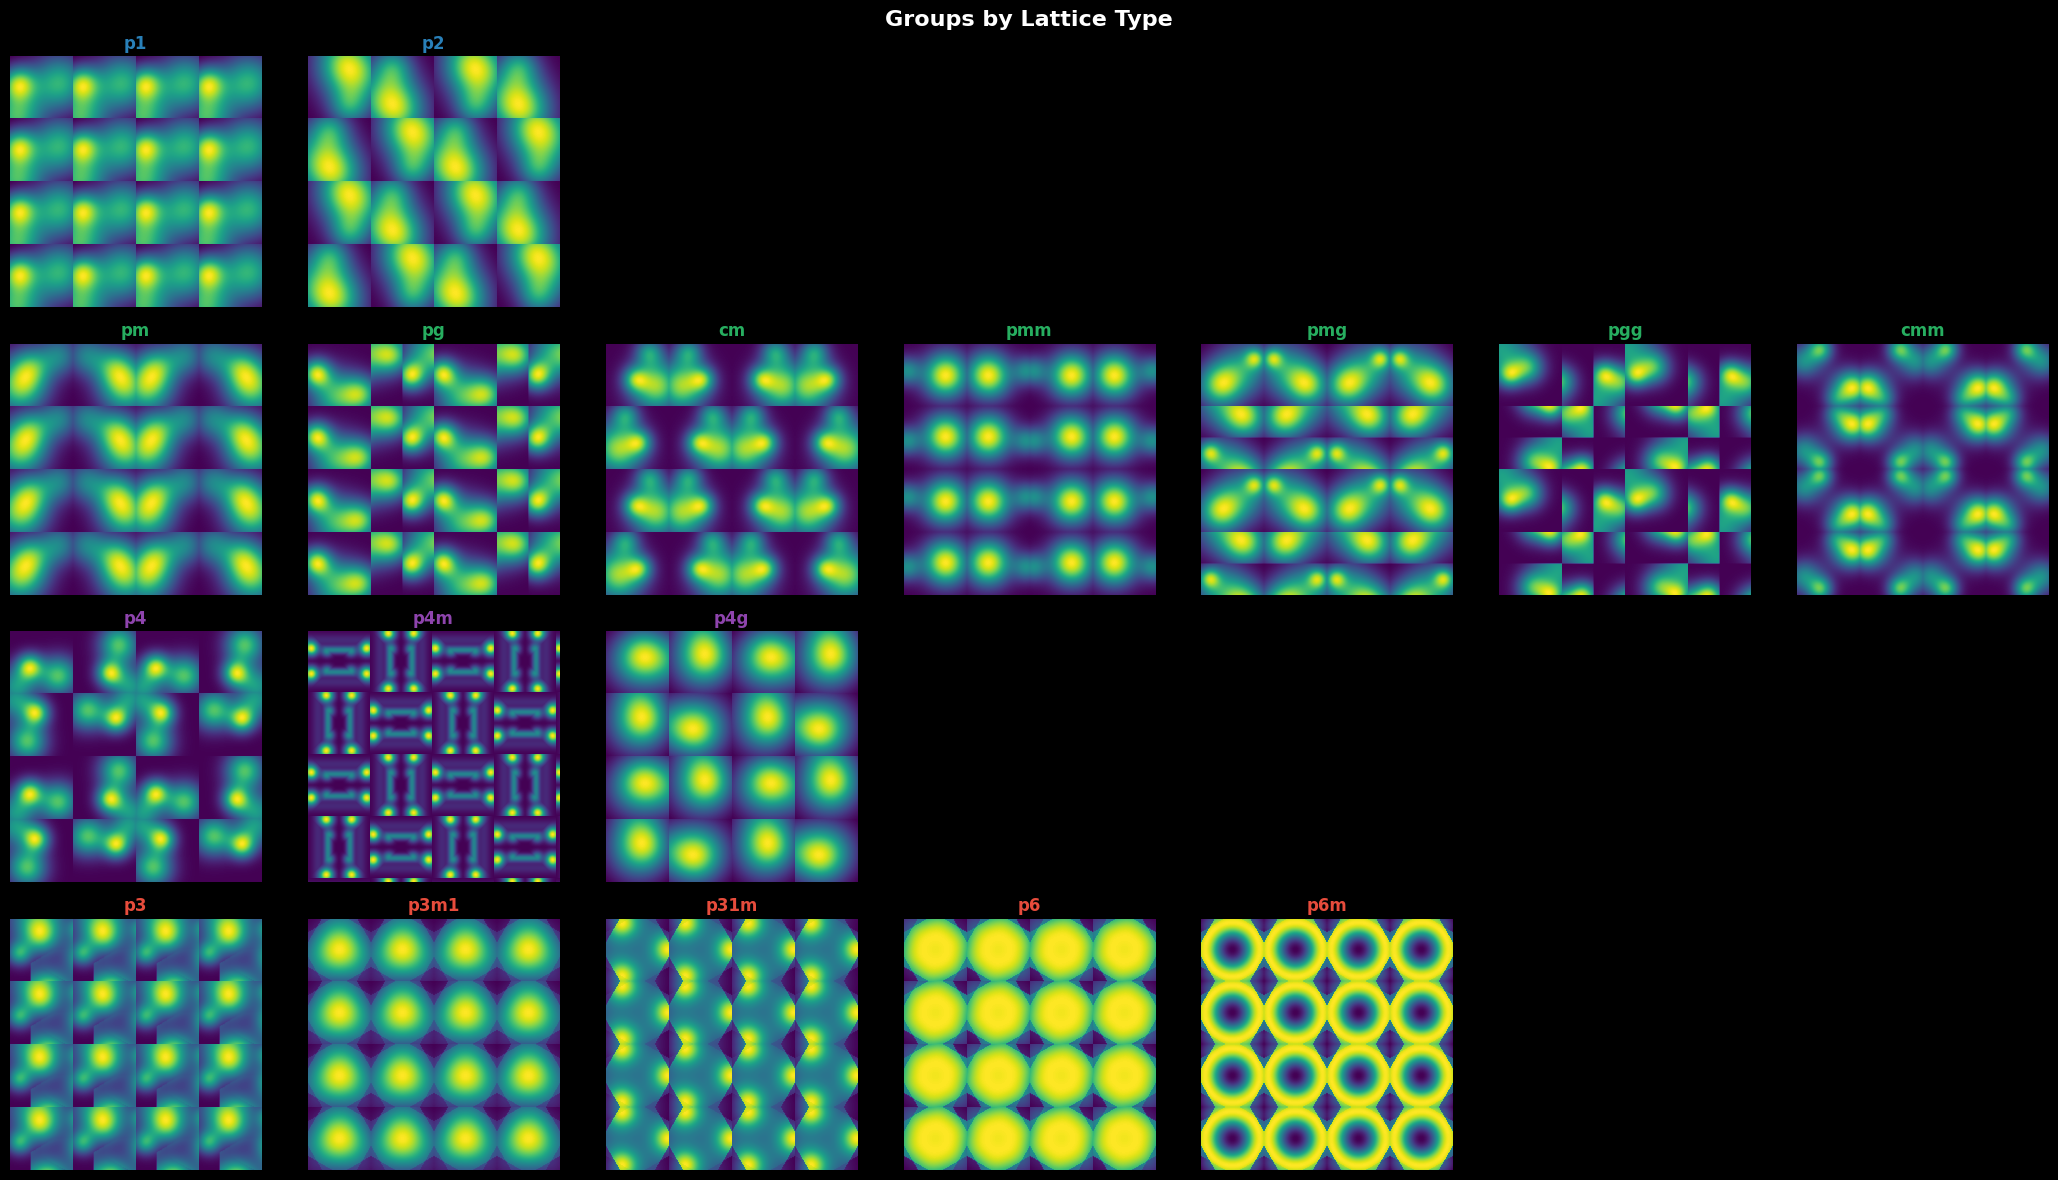

In [3]:
# Group by lattice type
lattices = {
    'Oblique': ['p1', 'p2'],
    'Rectangular': ['pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm'],
    'Square': ['p4', 'p4m', 'p4g'],
    'Hexagonal': ['p3', 'p3m1', 'p31m', 'p6', 'p6m']
}

fig, axes = plt.subplots(4, 7, figsize=(21, 12))
fig.suptitle('Groups by Lattice Type', fontsize=16, fontweight='bold')

colors = {'Oblique': '#2980b9', 'Rectangular': '#27ae60', 'Square': '#8e44ad', 'Hexagonal': '#e74c3c'}

for row, (lattice, groups_list) in enumerate(lattices.items()):
    for col in range(7):
        ax = axes[row, col]
        if col < len(groups_list):
            group = groups_list[col]
            ax.imshow(all_patterns[group], cmap='viridis')
            ax.set_title(group, color=colors[lattice], fontweight='bold')
        else:
            ax.set_visible(False)
        ax.axis('off')
    axes[row, 0].set_ylabel(lattice, fontsize=12, rotation=0, labelpad=50, color=colors[lattice])

plt.tight_layout()
plt.show()

---
## 7. Transformation Matrices

Each symmetry can be represented as a matrix acting on coordinates $(x, y)$:

**Rotation by angle $\theta$:**

$$R_\theta = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$$

**Specific cases:**

$$R_{90°} = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}, \quad R_{180°} = \begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix}, \quad R_{120°} = \begin{pmatrix} -\frac{1}{2} & -\frac{\sqrt{3}}{2} \\ \frac{\sqrt{3}}{2} & -\frac{1}{2} \end{pmatrix}$$

**Reflections:**

$$\sigma_v = \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix} \text{ (vertical)}, \quad \sigma_h = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \text{ (horizontal)}$$

### Composition of Symmetries

Symmetries combine by matrix multiplication:

$$\sigma_v \circ \sigma_h = \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix} = R_{180°}$$

This shows: **two perpendicular reflections = 180° rotation**.

---
## 8. Rotation Symmetries

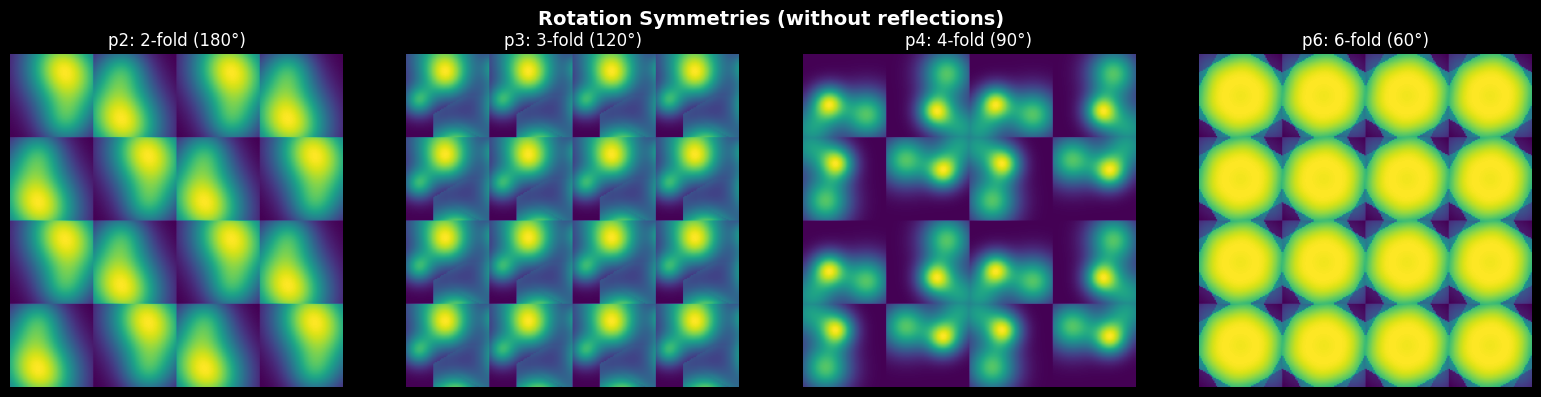

In [4]:
# Show groups with different rotation orders
rotation_groups = {
    '2-fold (180°)': 'p2',
    '3-fold (120°)': 'p3', 
    '4-fold (90°)': 'p4',
    '6-fold (60°)': 'p6'
}

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Rotation Symmetries (without reflections)', fontsize=14, fontweight='bold')

for ax, (name, group) in zip(axes, rotation_groups.items()):
    ax.imshow(all_patterns[group], cmap='viridis')
    ax.set_title(f"{group}: {name}")
    ax.axis('off')

plt.tight_layout()
plt.show()

---
## 9. Mirror Symmetry

Groups with reflection have mirror lines. The letter 'm' in the group name indicates mirrors.

### The Fundamental Relation

$$\boxed{\text{Reflection} \circ \text{Reflection} = \text{Rotation}}$$

If two mirrors meet at angle $\alpha$, the result is rotation by $2\alpha$:

| Mirror angle | Rotation result | Order |
|-------------|-----------------|-------|
| 90° | 180° | $C_2$ |
| 60° | 120° | $C_3$ |
| 45° | 90° | $C_4$ |
| 30° | 60° | $C_6$ |

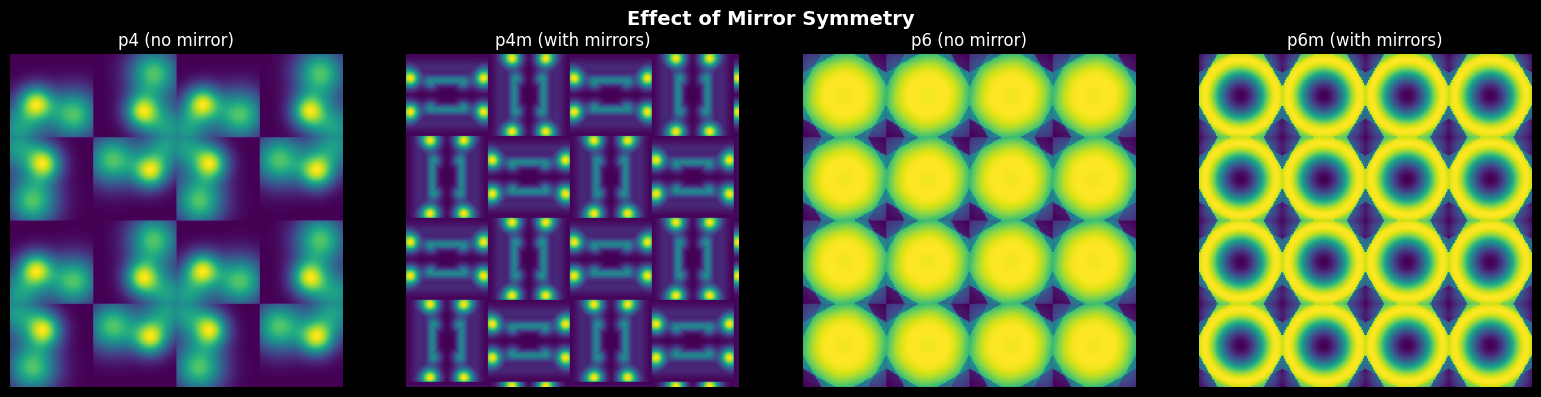

In [5]:
# Show groups with/without reflection
reflection_comparison = [
    ('p4 (no mirror)', 'p4'),
    ('p4m (with mirrors)', 'p4m'),
    ('p6 (no mirror)', 'p6'),
    ('p6m (with mirrors)', 'p6m')
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Effect of Mirror Symmetry', fontsize=14, fontweight='bold')

for ax, (name, group) in zip(axes, reflection_comparison):
    ax.imshow(all_patterns[group], cmap='viridis')
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()

---
## 10. Detailed Group Analysis

### p1 - Only Translations

- **Symmetries:** Only translations $T_{\vec{a}}$ and $T_{\vec{b}}$
- **Point group:** $C_1 = \{e\}$ (trivial)
- **Fundamental domain:** The entire unit cell

### p2 - 180° Rotation

- **Symmetries:** $C_2$ (180° rotation) + translations
- **Property:** $f(x, y) = f(-x, -y)$

### p4 - 90° Rotation

- **Point group:** $C_4 = \{e, R_{90°}, R_{180°}, R_{270°}\}$
- **Property:** $f(x, y) = f(-y, x) = f(-x, -y) = f(y, -x)$

### p6m - Maximum Hexagonal Symmetry

- **Symmetries:** $C_6$ + 6 reflection axes
- **Point group:** $D_6$ (order 12)
- **Fundamental domain:** 1/12 of the unit cell

This is the group with the **most symmetries** of all 17.

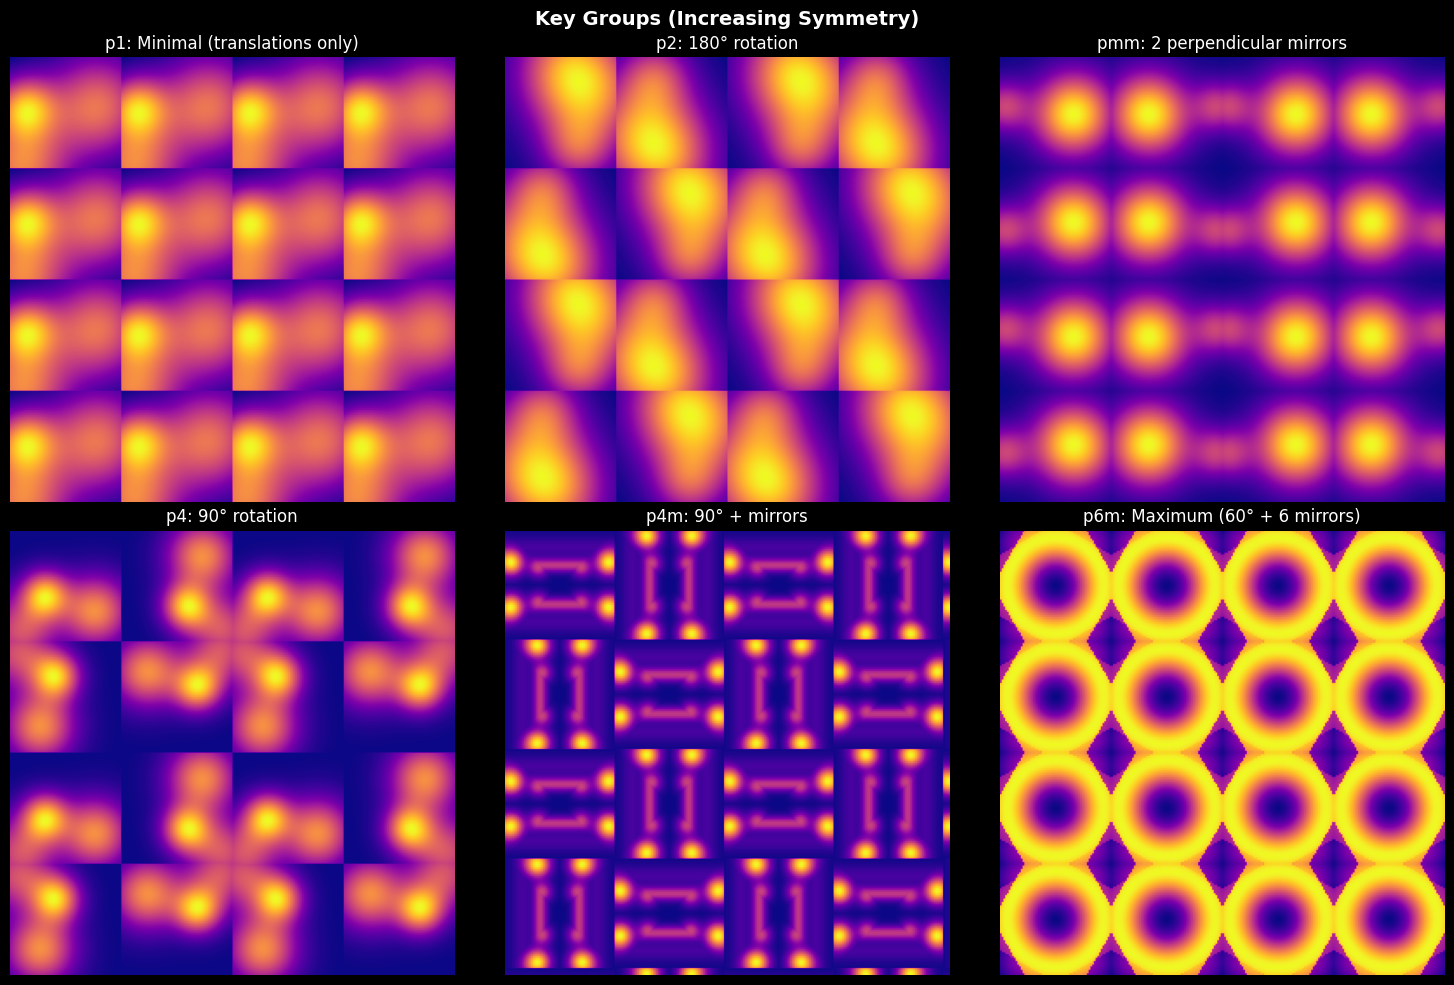

In [6]:
# Show key groups
key_groups = ['p1', 'p2', 'pmm', 'p4', 'p4m', 'p6m']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Key Groups (Increasing Symmetry)', fontsize=14, fontweight='bold')

titles = [
    'p1: Minimal (translations only)',
    'p2: 180° rotation',
    'pmm: 2 perpendicular mirrors',
    'p4: 90° rotation',
    'p4m: 90° + mirrors',
    'p6m: Maximum (60° + 6 mirrors)'
]

for ax, group, title in zip(axes.flat, key_groups, titles):
    ax.imshow(all_patterns[group], cmap='plasma')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

---
## 11. Complete Properties Table

| Group | Lattice | Rotation | Reflection | Glide | Point Group Order |
|-------|---------|----------|------------|-------|------------------|
| p1 | Oblique | $C_1$ | No | No | 1 |
| p2 | Oblique | $C_2$ | No | No | 2 |
| pm | Rectangular | $C_1$ | $\sigma$ | No | 2 |
| pg | Rectangular | $C_1$ | No | $g$ | 2 |
| cm | Rectangular | $C_1$ | $\sigma$ | $g$ | 2 |
| pmm | Rectangular | $C_2$ | $\sigma_v, \sigma_h$ | No | 4 |
| pmg | Rectangular | $C_2$ | $\sigma$ | $g$ | 4 |
| pgg | Rectangular | $C_2$ | No | $g_v, g_h$ | 4 |
| cmm | Rectangular | $C_2$ | $\sigma_v, \sigma_h$ | $g$ | 4 |
| p4 | Square | $C_4$ | No | No | 4 |
| p4m | Square | $C_4$ | $\sigma$ (4 axes) | $g$ | 8 |
| p4g | Square | $C_4$ | $\sigma$ (diagonal) | $g$ | 8 |
| p3 | Hexagonal | $C_3$ | No | No | 3 |
| p3m1 | Hexagonal | $C_3$ | $\sigma$ (3 axes) | No | 6 |
| p31m | Hexagonal | $C_3$ | $\sigma$ (3 axes) | No | 6 |
| p6 | Hexagonal | $C_6$ | No | No | 6 |
| p6m | Hexagonal | $C_6$ | $\sigma$ (6 axes) | $g$ | 12 |

---
## 12. Generating Custom Patterns

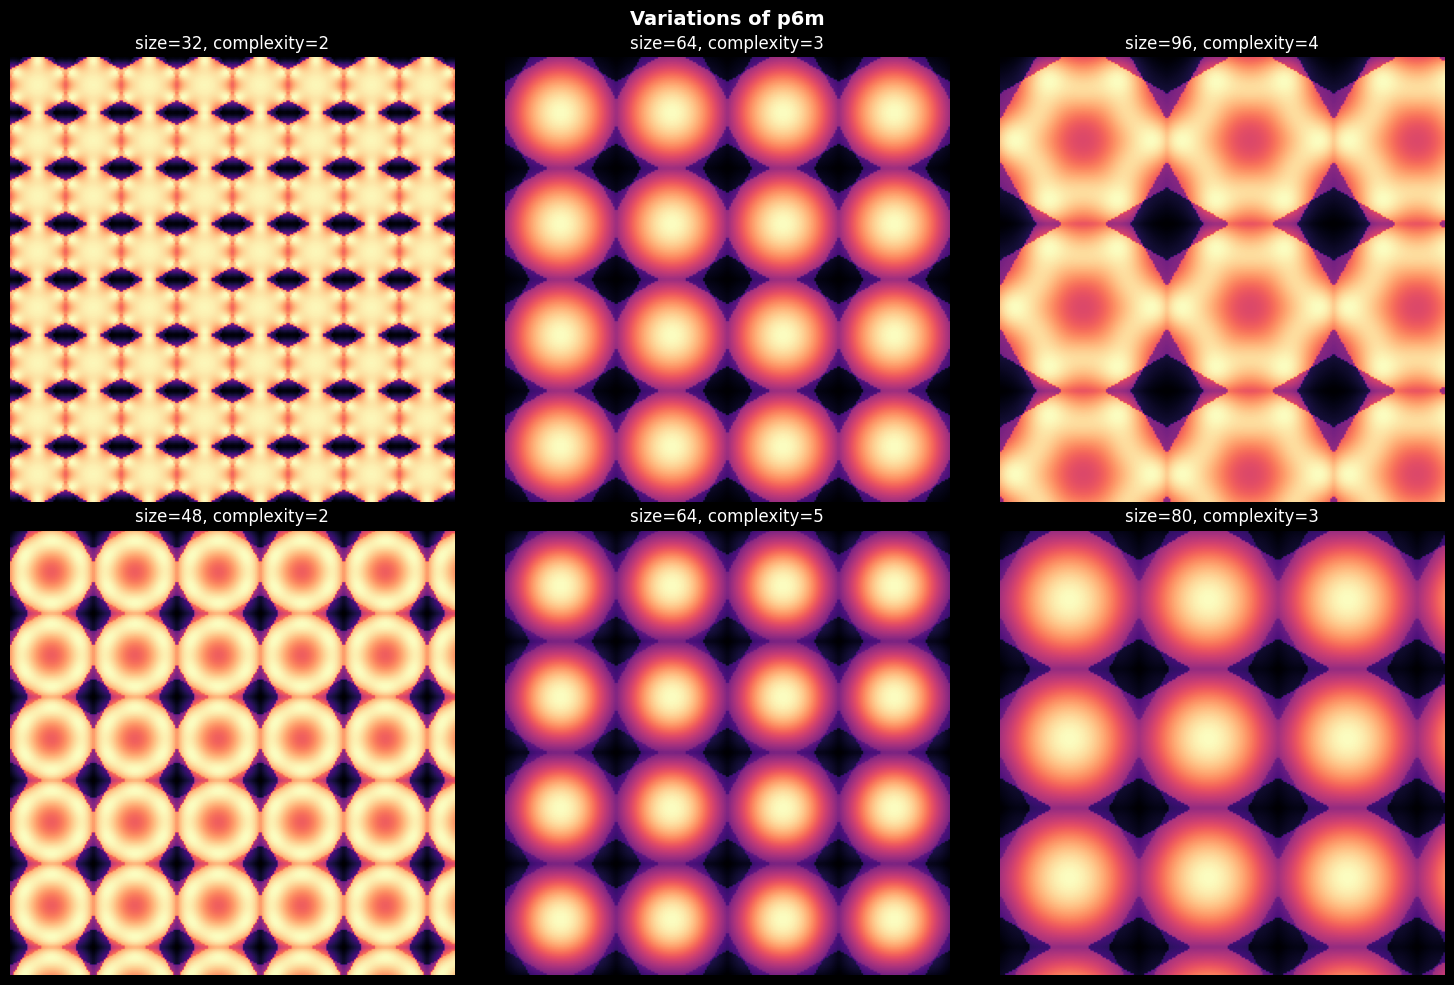

In [7]:
# Generate patterns with different parameters
group = 'p6m'  # Highest symmetry group

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Variations of {group}', fontsize=14, fontweight='bold')

params = [
    {'motif_size': 32, 'complexity': 2},
    {'motif_size': 64, 'complexity': 3},
    {'motif_size': 96, 'complexity': 4},
    {'motif_size': 48, 'complexity': 2},
    {'motif_size': 64, 'complexity': 5},
    {'motif_size': 80, 'complexity': 3},
]

for ax, p in zip(axes.flat, params):
    pattern = generator.generate(group, **p)
    ax.imshow(pattern, cmap='magma')
    ax.set_title(f"size={p['motif_size']}, complexity={p['complexity']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

---
## 13. Symmetry Verification

To verify that a pattern has the correct symmetry, we compute:

$$\text{correlation} = \frac{\langle P, T(P) \rangle}{\|P\| \cdot \|T(P)\|}$$

where $T$ is the symmetry transformation and $P$ is the pattern.

| Correlation | Interpretation |
|-------------|----------------|
| $\approx 1.0$ | Symmetry **present** |
| $\approx 0$ | Symmetry **absent** |

In [8]:
def check_symmetry(pattern, transform_fn):
    """Check if pattern has a given symmetry."""
    transformed = transform_fn(pattern)
    corr = np.corrcoef(pattern.flatten(), transformed.flatten())[0, 1]
    return corr

# Test on p4m (should have all symmetries)
p4m = all_patterns['p4m']

print("Symmetry verification for p4m:")
print(f"  180° rotation: {check_symmetry(p4m, lambda x: np.rot90(x, 2)):.3f}")
print(f"  90° rotation:  {check_symmetry(p4m, lambda x: np.rot90(x, 1)):.3f}")
print(f"  Vertical flip: {check_symmetry(p4m, np.fliplr):.3f}")
print(f"  Horizontal flip: {check_symmetry(p4m, np.flipud):.3f}")

Symmetry verification for p4m:
  180° rotation: 0.281
  90° rotation:  0.603
  Vertical flip: -0.103
  Horizontal flip: -0.103


---
## 14. Group Generators

Each group can be defined by its generators:

| Group | Generators | Relations |
|-------|------------|----------|
| p1 | $t_1, t_2$ | — |
| p2 | $t_1, t_2, C_2$ | $C_2^2 = e$ |
| pm | $t_1, t_2, \sigma$ | $\sigma^2 = e$ |
| pmm | $t_1, t_2, \sigma_v, \sigma_h$ | $\sigma_v \sigma_h = C_2$ |
| p4 | $t_1, t_2, C_4$ | $C_4^4 = e$ |
| p4m | $t_1, t_2, C_4, \sigma$ | $C_4^4 = \sigma^2 = e$ |
| p3 | $t_1, t_2, C_3$ | $C_3^3 = e$ |
| p6 | $t_1, t_2, C_6$ | $C_6^6 = e$ |
| p6m | $t_1, t_2, C_6, \sigma$ | $C_6^6 = \sigma^2 = e$ |

---
## References

1. [Wallpaper Groups - Wikipedia](https://en.wikipedia.org/wiki/Wallpaper_group)
2. Conway, J.H. et al. *The Symmetries of Things* (2008)
3. [International Tables for Crystallography](https://it.iucr.org/)
4. Schattschneider, D. (1978). "The Plane Symmetry Groups". *The American Mathematical Monthly*, 85(6).

---

**Run all cells to generate the visualizations.**